# Amazon Fine Food Reviews with LSTM

In [0]:
import pickle
pickle_in = open("amzn_df.pickle","rb")
amzn = pickle.load(pickle_in)


In [0]:
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [3]:
amzn

,text,score
0,witty little book makes son laugh loud recite ...,1
1,remember seeing show aired television years ag...,1
2,beetlejuice well written movie everything exce...,1
3,twist rumplestiskin captured film starring mic...,1
4,beetlejuice excellent funny movie keaton hilar...,1
5,one movie movie collection filled comedy actio...,1
6,always enjoyed movie funny entertaining not he...,0
7,bought apartment infested fruit flies hours tr...,1
8,happens say name three times michael keaten st...,1
9,getting crazy looking beatlejuice french versi...,1


In [4]:
x = amzn['text']
y = amzn['score']
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=2)
sss.get_n_splits(x, y)

2

In [0]:
for train_index, test_index in sss.split(x, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [6]:
print('shape of x_train ', x_train.shape)
print('shape of y_train ', y_train.shape)
print('shape of x_test ', x_test.shape)
print('shape of y_test ', y_test.shape)

shape of x_train  (40000,)
shape of y_train  (40000,)
shape of x_test  (10000,)
shape of y_test  (10000,)


In [7]:
x_train.iloc[0:5]

398      price not even begin competitive local grocery...
490                                        great make time
25177    made muffins first time used chopped dates pec...
414      looking pods espresso machine give try francis...
44602    taking product months along benefiber try lowe...
Name: text, dtype: object

In [8]:
list_of_words = []
for i in tqdm(range(40000)):
    words_in_i = x_train.iloc[i].split()
    for j in range(len(words_in_i)):
        list_of_words.append(words_in_i[j])
    

In [9]:
len(list_of_words)

1469367

In [0]:
from collections import Counter
counts = Counter(list_of_words)


In [11]:
sorted_vocab = sorted(counts.items(), key=lambda x: x[1], reverse=True)
sorted_vocab

[('not', 36056),
 ('like', 15119),
 ('good', 13179),
 ('tea', 12707),
 ('great', 12226),
 ('taste', 10787),
 ('one', 10753),
 ('product', 9616),
 ('flavor', 9065),
 ('would', 8709),
 ('love', 7965),
 ('no', 6924),
 ('get', 6616),
 ('coffee', 6506),
 ('best', 6213),
 ('really', 6028),
 ('also', 5850),
 ('amazon', 5657),
 ('use', 5632),
 ('much', 5602),
 ('find', 5396),
 ('time', 5272),
 ('little', 5208),
 ('food', 5185),
 ('make', 5139),
 ('even', 4820),
 ('well', 4727),
 ('buy', 4700),
 ('tried', 4695),
 ('better', 4555),
 ('sugar', 4500),
 ('chocolate', 4371),
 ('eat', 4316),
 ('try', 4299),
 ('price', 4192),
 ('sweet', 3673),
 ('found', 3671),
 ('used', 3641),
 ('free', 3493),
 ('first', 3491),
 ('could', 3473),
 ('drink', 3395),
 ('made', 3313),
 ('delicious', 3250),
 ('mix', 3168),
 ('box', 3111),
 ('water', 3063),
 ('two', 3035),
 ('way', 3007),
 ('cup', 2991),
 ('bag', 2983),
 ('milk', 2929),
 ('tastes', 2874),
 ('bought', 2860),
 ('add', 2855),
 ('many', 2854),
 ('store', 2854),

In [12]:
len(sorted_vocab)

38123

In [0]:
top_words = {}
for i in range(5000):
  top_words[sorted_vocab[i][0]] = i+1

In [14]:
top_words

{'not': 1,
 'like': 2,
 'good': 3,
 'tea': 4,
 'great': 5,
 'taste': 6,
 'one': 7,
 'product': 8,
 'flavor': 9,
 'would': 10,
 'love': 11,
 'no': 12,
 'get': 13,
 'coffee': 14,
 'best': 15,
 'really': 16,
 'also': 17,
 'amazon': 18,
 'use': 19,
 'much': 20,
 'find': 21,
 'time': 22,
 'little': 23,
 'food': 24,
 'make': 25,
 'even': 26,
 'well': 27,
 'buy': 28,
 'tried': 29,
 'better': 30,
 'sugar': 31,
 'chocolate': 32,
 'eat': 33,
 'try': 34,
 'price': 35,
 'sweet': 36,
 'found': 37,
 'used': 38,
 'free': 39,
 'first': 40,
 'could': 41,
 'drink': 42,
 'made': 43,
 'delicious': 44,
 'mix': 45,
 'box': 46,
 'water': 47,
 'two': 48,
 'way': 49,
 'cup': 50,
 'bag': 51,
 'milk': 52,
 'tastes': 53,
 'bought': 54,
 'add': 55,
 'many': 56,
 'store': 57,
 'think': 58,
 'makes': 59,
 'nice': 60,
 'favorite': 61,
 'since': 62,
 'order': 63,
 'recommend': 64,
 'go': 65,
 'day': 66,
 'hot': 67,
 'ever': 68,
 'want': 69,
 'years': 70,
 'know': 71,
 'organic': 72,
 'bit': 73,
 'still': 74,
 'never':

In [0]:
import pandas as pd
import numpy as np

In [0]:
x_train_vec = []

for i in range(40000):
    words = []
    words_in_i = x_train.iloc[i].split()
    for j in range(len(words_in_i)):
        key_word = words_in_i[j]
        if key_word in top_words:
           words.append(top_words[key_word])
           
    x_train_vec.append(words)
               

In [0]:
x_test_vec = []
for i in range(10000):
    words = []
    words_in_i = x_test.iloc[i].split()
    for j in range(len(words_in_i)):
        key_word = words_in_i[j]
        if key_word in top_words:
           words.append(top_words[key_word])
           
    x_test_vec.append(words)

In [0]:
x_train = x_train_vec
x_test = x_test_vec

In [19]:
x_train

[[35, 1, 26, 2166, 3494, 142, 153, 159, 289, 860, 2465, 1817, 1654],
 [5, 25, 22],
 [43,
  1045,
  40,
  22,
  38,
  1136,
  1948,
  2207,
  110,
  25,
  171,
  876,
  2102,
  319,
  322,
  557,
  1,
  26,
  911],
 [168,
  393,
  398,
  411,
  82,
  34,
  29,
  15,
  17,
  143,
  668,
  409,
  430,
  60,
  564,
  1,
  865,
  419,
  2895],
 [787,
  8,
  269,
  480,
  34,
  676,
  941,
  1535,
  126,
  2439,
  662,
  85,
  1038,
  176,
  452,
  12,
  746,
  831,
  2955,
  2865,
  320,
  33,
  703,
  10,
  3,
  174,
  663,
  265,
  746,
  1693,
  836,
  941,
  1756,
  4901,
  1756,
  3907,
  26,
  336,
  200,
  123,
  536,
  176,
  23,
  104,
  1838,
  219,
  10,
  787,
  697,
  148,
  854,
  2047,
  1907,
  3767,
  26,
  1,
  122,
  150,
  48,
  85,
  1562,
  746,
  342,
  692,
  48,
  102,
  941,
  69,
  815,
  4140,
  10,
  82,
  34,
  6,
  16,
  3,
  2,
  966,
  17,
  572,
  148,
  480,
  108,
  25,
  150,
  104,
  1772,
  275,
  243,
  787,
  3495,
  422,
  258,
  148,
  33,
  258,
 

In [20]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)


Using TensorFlow backend.


In [21]:
max_review_length = []
for i in range(40000):
    max_review_length.append(len(x_train[i][:]))
    
max_review_length  = max(max_review_length)
print("max_review_length : ", max_review_length)

max_review_length :  738


In [22]:
# truncate and/or pad input sequences
max_review_length = 700 # discarding 38 words 
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print(x_train.shape)
print(x_train[0])

(40000, 700)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
top_words = 5000

In [0]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())
    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)
  
  
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision  
  

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
  

In [0]:
def param():
    x_train = x_train
    x_test = x_test
    y_train = y_train
    y_test = y_test
    

**2 Layer LSTM Model**

In [0]:
# create the model
def hyper_tunning(lstm_unit, drop_rate, param):
  
    embedding_vecor_length = 16
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
    
    model.add(LSTM(lstm_unit, return_sequences=True))
    model.add(Dropout(drop_rate))
    
    model.add(LSTM(lstm_unit))
    model.add(Dropout(drop_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',f1_m])
    #print(model.summary())
    model = model.fit(x_train, y_train, validation_split= 0.2, epochs=12,verbose=0,\
                      batch_size=1024, validation_data = (x_test, y_test) )
    #print(model.summary())
    #Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model
    return model

In [0]:
from keras.layers import Dropout

In [28]:
lstm_units = [24, 32, 40]
drop_rates = [0.2, 0.5, 0.8]

df1 = pd.DataFrame(columns = ["lstm_unit", "drop_out rate", "test acc", "val acc"],
                  index = ["model_" + str(x) for x in range(1,10)])
c = 0
for i, lstm_unit in tqdm(enumerate(lstm_units)):
    for j, drop_rate in tqdm(enumerate(drop_rates)):
      
        model  = hyper_tunning(lstm_unit, drop_rate, param)
                   
        ty = np.round((max(model.history['acc']))*100, 2)
        index = model.history['acc'].index(max(model.history['acc']))            
        vy = np.round(((model.history['val_acc'][index]))*100, 2)
                   
        df1.iloc[c, 0]  = lstm_unit
        df1.iloc[c, 1]  = drop_rate
        df1.iloc[c, 2]  = ty
        df1.iloc[c, 3]  = vy           
        
        c = c+1
        
# Final evaluation of the model
#scores = model.evaluate(x_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [29]:
df1

,lstm_unit,drop_out rate,test acc,val acc
model_1,24,0.2,96.62,91.93
model_2,24,0.5,96.48,91.98
model_3,24,0.8,96.18,92.15
model_4,32,0.2,96.72,92.8
model_5,32,0.5,96.74,92.4
model_6,32,0.8,96.52,92.43
model_7,40,0.2,96.73,92.3
model_8,40,0.5,96.74,92.38
model_9,40,0.8,96.56,92.11


In [30]:
sorted_df1 = df1.sort_values('val acc', ascending=False)
sorted_df1

,lstm_unit,drop_out rate,test acc,val acc
model_4,32,0.2,96.72,92.8
model_6,32,0.8,96.52,92.43
model_5,32,0.5,96.74,92.4
model_8,40,0.5,96.74,92.38
model_7,40,0.2,96.73,92.3
model_3,24,0.8,96.18,92.15
model_9,40,0.8,96.56,92.11
model_2,24,0.5,96.48,91.98
model_1,24,0.2,96.62,91.93


In [31]:
print("model_3 is best becuase it has less parameter")

model_3 is best becuase it has less parameter


In [32]:
df1.loc['model_3']

lstm_unit           24
drop_out rate      0.8
test acc         96.18
val acc          92.15
Name: model_3, dtype: object

In [0]:
model = hyper_tunning(24, 0.8, param)

In [0]:
ty1 = np.round([item * 100 for item in model.history['acc']], 2)
vy1 = np.round([item * 100 for item in model.history['val_acc']], 2)

In [0]:
import matplotlib.pyplot as plt

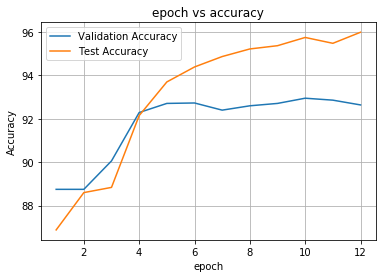

In [36]:
plt.plot(range(1,13), vy1, label = 'Validation Accuracy')
plt.plot(range(1,13), ty1, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy")
plt.show()

**3 Layer LSTM Model**

In [0]:
# create the model
def hyper_tunning(lstm_unit, drop_rate, param):
  
    embedding_vecor_length = 16
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
    
    model.add(LSTM(lstm_unit, return_sequences=True))
    model.add(Dropout(drop_rate))
    
    model.add(LSTM(lstm_unit, return_sequences=True))
    model.add(Dropout(drop_rate))
    
    model.add(LSTM(lstm_unit))
    model.add(Dropout(drop_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',f1_m])
    #print(model.summary())
    model = model.fit(x_train, y_train, validation_split= 0.2, epochs=12,verbose=0,\
                      batch_size=1024, validation_data = (x_test, y_test) )
    #print(model.summary())
    #Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model
    return model

In [38]:
lstm_units = [24, 32, 40]
drop_rates = [0.2, 0.5, 0.8]

df2 = pd.DataFrame(columns = ["lstm_unit", "drop_out rate", "test acc", "val acc"],
                  index = ["model_" + str(x) for x in range(1,10)])
c = 0
for i, lstm_unit in tqdm(enumerate(lstm_units)):
    for j, drop_rate in tqdm(enumerate(drop_rates)):
      
        model  = hyper_tunning(lstm_unit, drop_rate, param)
                   
        ty = np.round((max(model.history['acc']))*100, 2)
        index = model.history['acc'].index(max(model.history['acc']))            
        vy = np.round(((model.history['val_acc'][index]))*100, 2)
                   
        df2.iloc[c, 0]  = lstm_unit
        df2.iloc[c, 1]  = drop_rate
        df2.iloc[c, 2]  = ty
        df2.iloc[c, 3]  = vy           
        
        c = c+1
        
# Final evaluation of the model
#scores = model.evaluate(x_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

In [39]:
df2

,lstm_unit,drop_out rate,test acc,val acc
model_1,24,0.2,96.84,92.27
model_2,24,0.5,96.64,92.19
model_3,24,0.8,96.11,92.55
model_4,32,0.2,96.71,92.48
model_5,32,0.5,96.65,92.22
model_6,32,0.8,96.4,92.13
model_7,40,0.2,96.78,91.83
model_8,40,0.5,96.46,92.57
model_9,40,0.8,96.54,91.64


In [40]:

sorted_df2 = df2.sort_values('val acc', ascending=False)
sorted_df2

,lstm_unit,drop_out rate,test acc,val acc
model_8,40,0.5,96.46,92.57
model_3,24,0.8,96.11,92.55
model_4,32,0.2,96.71,92.48
model_1,24,0.2,96.84,92.27
model_5,32,0.5,96.65,92.22
model_2,24,0.5,96.64,92.19
model_6,32,0.8,96.4,92.13
model_7,40,0.2,96.78,91.83
model_9,40,0.8,96.54,91.64


In [41]:
print("Model_3 looks nice and have less parameter")

Model_3 looks nice and have less parameter


In [42]:
df2.loc['model_3']

lstm_unit           24
drop_out rate      0.8
test acc         96.11
val acc          92.55
Name: model_3, dtype: object

In [0]:
model = hyper_tunning(24, 0.8, param)

In [0]:
ty1 = np.round([item * 100 for item in model.history['acc']], 2)
vy1 = np.round([item * 100 for item in model.history['val_acc']], 2)

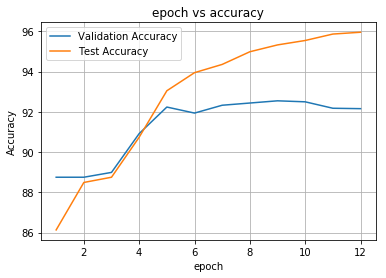

In [45]:
plt.plot(range(1,13), vy1, label = 'Validation Accuracy')
plt.plot(range(1,13), ty1, label = "Test Accuracy")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("epoch vs accuracy")
plt.show()

In [46]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "layer", " lstm unit", "drop rate", "test acc", "val acc"]

x.add_row(["1", 2, 24, 0.8, 96.18, 92.15 ])
x.add_row(["2", 3, 24, 0.8, 96.11, 92.55 ])

 
print(x)

+-------+-------+------------+-----------+----------+---------+
| Model | layer |  lstm unit | drop rate | test acc | val acc |
+-------+-------+------------+-----------+----------+---------+
|   1   |   2   |     24     |    0.8    |  96.18   |  92.15  |
|   2   |   3   |     24     |    0.8    |  96.11   |  92.55  |
+-------+-------+------------+-----------+----------+---------+


**Conclusion**

* we have 3 architectire with different layer and drop out rate with 
  batch normalization
* After that we tune hyperparameter with drop out and activation function
* Actually all architeure were run over google colab and made pickle file
  and loaded here becuase over colab it was fater than jupyter(4times)
* Then plotted the table with all 3 architure 
* we noticed that all 3 model giving same accuracy so we will pick which have
  less number of parameter that is 2 layer network because it is faster to 
  train and test  